In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
mse = [0, 5, 10, 20, 100, 200]

In [38]:
def cargar(archivo):
    file = open(archivo, "rb")
    clase = pickle.load(file)
    file.close()
    return clase

def graficar_k(astar, fs_k2, fs_k4, pos_k2, pos_k4, best_k2, best_k4, w, log=False):
    astar = astar.sacar_promedio(w)
    fs_k2_p = fs_k2.sacar_promedio(w)
    fs_k4_p = fs_k4.sacar_promedio(w)
    pos_k2_p = pos_k2.sacar_promedio(w)
    pos_k4_p = pos_k4.sacar_promedio(w)
    best_k2_p = best_k2.sacar_promedio(w)
    best_k4_p = best_k4.sacar_promedio(w)
    
    for i in range(0, 2):
        if i == 0:
            fs, pos, best = fs_k2_p, pos_k2_p, best_k2_p
        else:
            fs, pos, best = fs_k4_p, pos_k4_p, best_k4_p
        # gráfico tiempo vs mse
        fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
        fig.tight_layout(pad=3)
        ax[0].plot([1,2,3,4,5,6], astar[0], label="A*", c="purple")
        ax[0].plot([1,2,3,4,5,6], fs[0], label="FS", c="red")
        ax[0].plot([1,2,3,4,5,6], pos[0], label="FDS pos", c="blue")
        ax[0].plot([1,2,3,4,5,6], best[0], label="FDS best", c="green")
        ax[0].set_xticks([1,2,3,4,5,6], mse)
        # ax[0].legend(fontsize=8, loc="upper left")
        ax[0].legend(fontsize=8)
        ax[0].set_xlabel("Heuristic MSE", fontsize=10)
        ax[0].set_ylabel("Runtime (s)", fontsize=10)
        ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: {(i + 1)*2}", fontsize=10)
        if log:
            plt.yscale("log")
        # gráfico expansiones vs mse
        fig.tight_layout(pad=3)
        ax[1].plot([1,2,3,4,5,6], astar[1], label="A*", c="purple")
        ax[1].plot([1,2,3,4,5,6], fs[1], label="FS", c="red")
        ax[1].plot([1,2,3,4,5,6], pos[1], label="FDS pos", c="blue")
        ax[1].plot([1,2,3,4,5,6], best[1], label="FDS best", c="green")
        ax[1].set_xticks([1,2,3,4,5,6], mse)
        # ax[0].legend(fontsize=8, loc="upper left")
        ax[1].legend(fontsize=8)
        ax[1].set_xlabel("Heuristic MSE", fontsize=10)
        ax[1].set_ylabel("Expansions", fontsize=10)
        ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: {(i + 1)*2}", fontsize=10)
        if log:
            plt.yscale("log")
    graficar_per_k(fs_k2, fs_k4, pos_k2, pos_k4, best_k2, best_k4, w, log)
            
def promedio_datos(datos):
    mse_0, mse_5, mse_10, mse_20, mse_100, mse_200 = [], [], [], [], [], []
    datos = [dato.per for dato in datos]
    for dato in datos:
        mse_0.append(dato[0])
        mse_5.append(dato[1])
        mse_10.append(dato[2])
        mse_20.append(dato[3])
        mse_100.append(dato[4])
        mse_200.append(dato[5])
    datos = [mse_0, mse_5, mse_10, mse_20, mse_100, mse_200]
    promedios = [np.mean(dato)*100 for dato in datos]
    return promedios
            
def graficar_per_k(fs_k2, fs_k4, pos_k2, pos_k4, best_k2, best_k4, w, log=False):
    cosas = [fs_k2, fs_k4, pos_k2, pos_k4, best_k2, best_k4]
    if w == 1.5:
        datos = [dato.datos_w15 for dato in cosas]
    elif w == 2:
        datos = [dato.datos_w2 for dato in cosas]
    else:
        datos = [dato.datos_w4 for dato in cosas]
    fs_k2 = promedio_datos(datos[0])
    fs_k4 = promedio_datos(datos[1])
    pos_k2 = promedio_datos(datos[2])
    pos_k4 = promedio_datos(datos[3])
    best_k2 = promedio_datos(datos[4])
    best_k4 = promedio_datos(datos[5])
    for i in range(0, 2):
        if i == 0:
            fs, pos, best = fs_k2, pos_k2, best_k2
        else:
            fs, pos, best = fs_k4, pos_k4, best_k4
        fig,ax = plt.subplots(dpi=144, figsize = [10,4])
        ax.plot([1,2,3,4,5,6], fs, label="FS", c="red")
        ax.plot([1,2,3,4,5,6], pos, label="FDS pos", c="blue")
        ax.plot([1,2,3,4,5,6], best, label="FDS best", c="green")
        ax.set_xticks([1,2,3,4,5,6], mse)
        ax.legend(fontsize=8)
        ax.set_xlabel("Heuristic MSE", fontsize=10)
        ax.set_ylabel("Percentages (%)", fontsize=10)
        ax.set_title(f"% vs MSE - W: {w} - k: {(i + 1)*2}", fontsize=10)

# ej 1 - 800k estados

In [40]:
astar1 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--a_star.pickle")
fs1_k2 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fs--k=2.pickle")
pos1_k2 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fds_pos--k=2.pickle")
best1_k2 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fds_best--k=2.pickle")
fs1_k4 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fs--k=4.pickle")
pos1_k4 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fds_pos--k=4.pickle")
best1_k4 = cargar("datos//dato_2023-09-11 18.46.07.876725_--can_prop=22--can_op=100--rango=3--max_add=6--min_ap=2--fds_best--k=4.pickle")

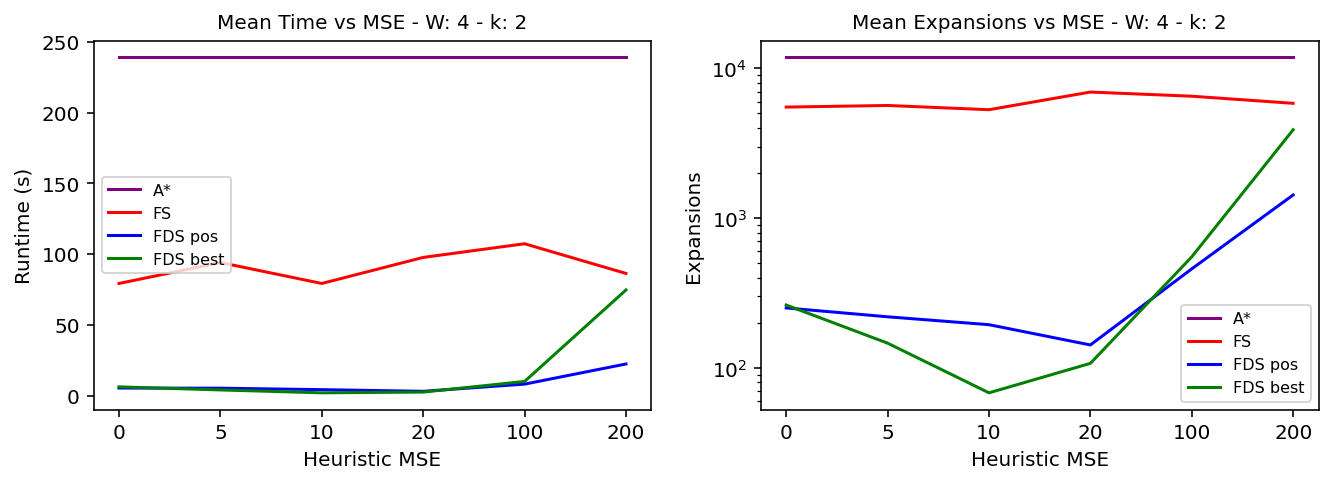

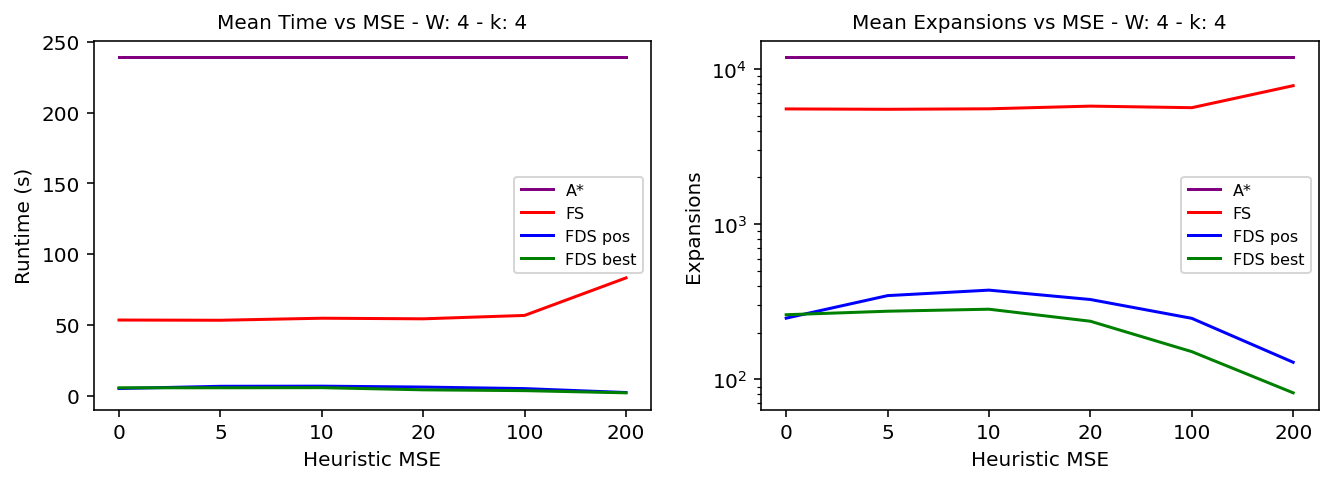

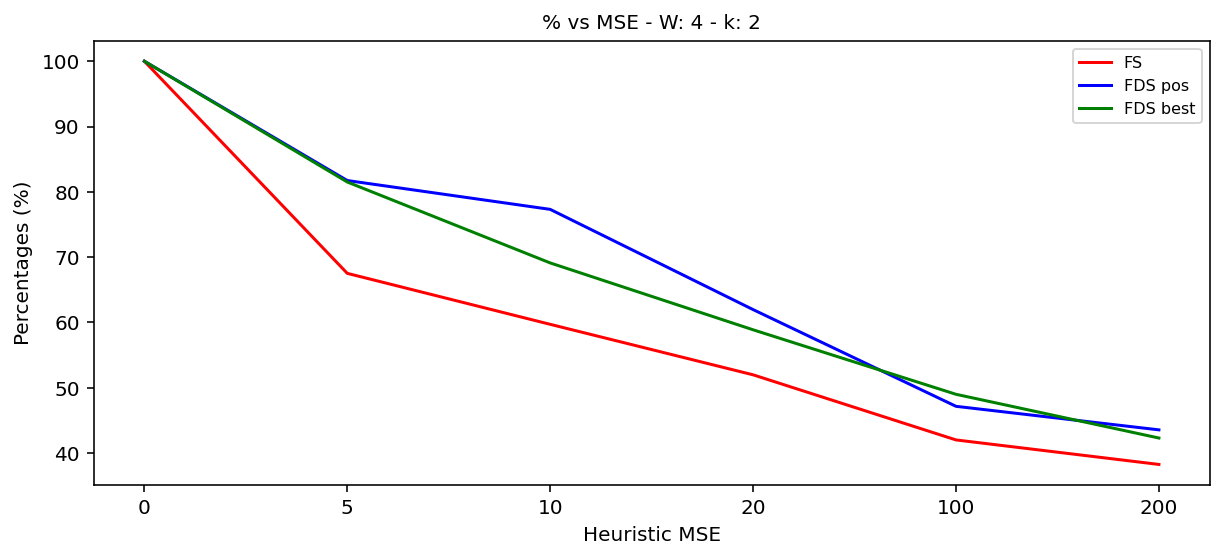

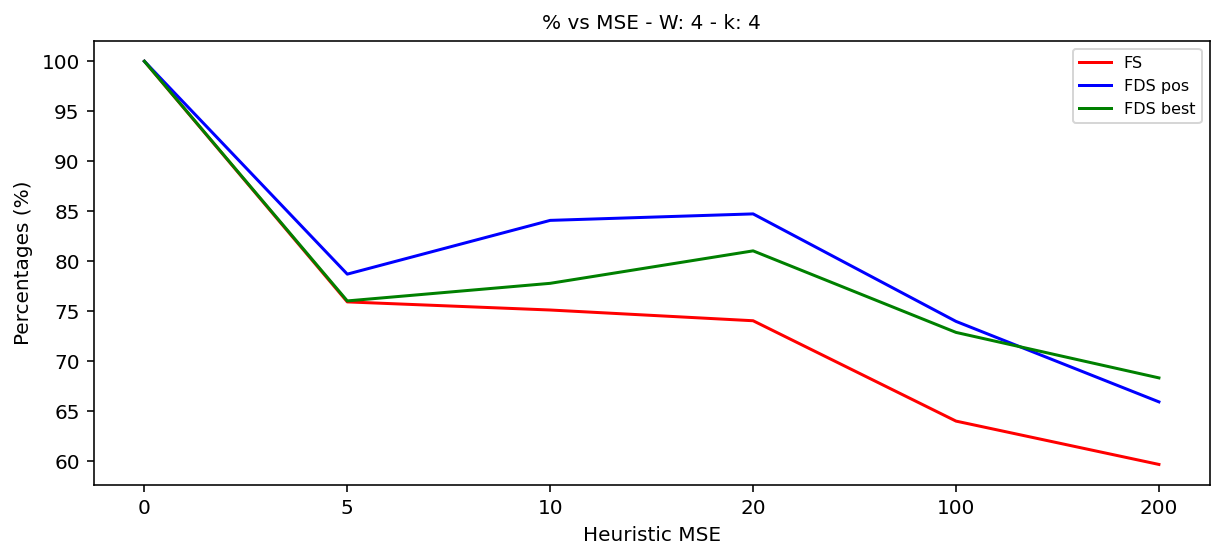

In [44]:
graficar_k(astar1, fs1_k2, fs1_k4, pos1_k2, pos1_k4, best1_k2, best1_k4, 4, True)